In [2]:
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
data_path = "./data/jigsaw-toxic-severity-rating/"
validation_data = pd.read_csv(data_path+"validation_data.csv")
data = pd.read_csv(data_path+"comments_to_score.csv")

In [4]:
validation_data.head()

,worker,less_toxic,more_toxic
0,313,This article sucks \n\nwoo woo wooooooo,WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!...
1,188,"""And yes, people should recognize that but the...",Daphne Guinness \n\nTop of the mornin' my fav...
2,82,"Western Media?\n\nYup, because every crime in...","""Atom you don't believe actual photos of mastu..."
3,347,And you removed it! You numbskull! I don't car...,You seem to have sand in your vagina.\n\nMight...
4,539,smelly vagina \n\nBluerasberry why don't you ...,"hey \n\nway to support nazis, you racist"


In [5]:
worker_freq_dict = dict(validation_data.worker.value_counts())
workers = sorted(list(worker_freq_dict.keys()))
worked = [worker_freq_dict[w] for w in workers]

### Plotting worker productivity

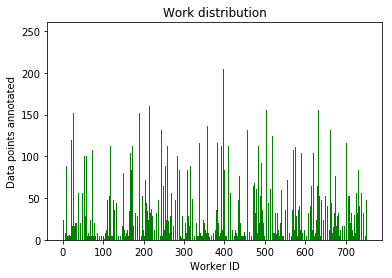

In [15]:
plt.bar(workers, worked, align='center', color='green')
# plt.xticks(workers, worked)
plt.title("Work distribution")
plt.xlabel("Worker ID")
plt.ylabel("Data points annotated")
plt.show()

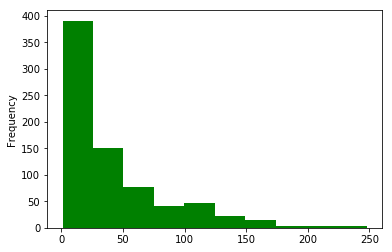

In [22]:
fig, ax = plt.subplots()
validation_data.worker.value_counts().plot(ax=ax, kind='hist', color='green')
plt.show()

### Plotting length of each comment against type of comment

In [7]:
less_toxic_lens = validation_data.less_toxic.apply(lambda x: len(x.split()))
more_toxic_lens = validation_data.more_toxic.apply(lambda x: len(x.split()))

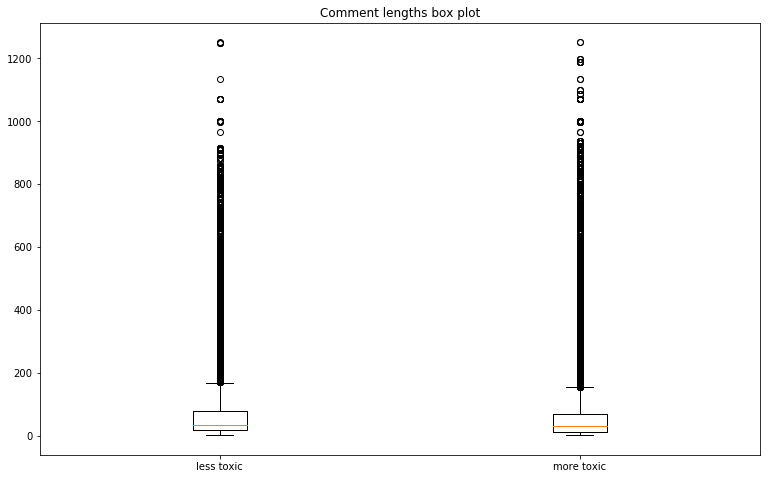

In [15]:
fig = plt.figure(figsize =(10, 6))
 
ax = fig.add_axes([0, 0, 1, 1])

bp = ax.boxplot([less_toxic_lens, more_toxic_lens])

ax.set_xticklabels(['less toxic', 'more toxic'])

plt.title("Comment lengths box plot")

plt.show()


## Plotting few vectors in 2D

Here we look at various embedding approaches and use UMAP to project them to 2D space and plot

### Tf-idf plots

In [6]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
corpus = np.concatenate([validation_data.less_toxic.apply(lambda x: x.replace("\n", "")).values, 
                         validation_data.more_toxic.apply(lambda x: x.replace("\n", "")).values])
tfidf_vecs = vectorizer.fit(corpus)

In [20]:
sampled_df = validation_data.sample(5000)

In [21]:
sampled_corpus_less = sampled_df.less_toxic.apply(lambda x: x.replace("\n", "")).values

sampled_corpus_more = sampled_df.more_toxic.apply(lambda x: x.replace("\n", "")).values

In [22]:
sampled_corpus.shape

(5000,)

In [33]:
tfidf_vecs_less = vectorizer.transform(sampled_corpus_less).toarray()
tfidf_vecs_more = vectorizer.transform(sampled_corpus_more).toarray()

In [36]:
embedding = umap.UMAP(n_components=2,
                      n_neighbors=15,
                      min_dist=0.3,
                      metric='correlation').fit_transform(np.concatenate([tfidf_vecs_less, tfidf_vecs_more]))

In [42]:
x_less = embedding[:5000,0]
y_less = embedding[:5000,1]
x_more = embedding[5000:,0]
y_more = embedding[5000:,1]

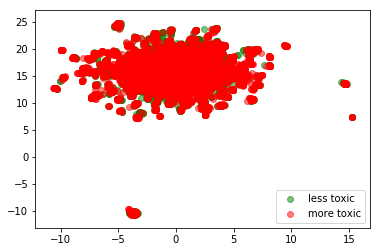

In [46]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x_less, y_less, color='green', alpha=0.5, label='less toxic')
ax1.scatter(x_more, y_more, color='red', alpha=0.5, label='more toxic')
plt.legend(loc='lower right')
plt.show()

We can see that both overlap quite a bit. We might need to move over to better embeddings

### USE plots